2022-10-20 08:56:44.459307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


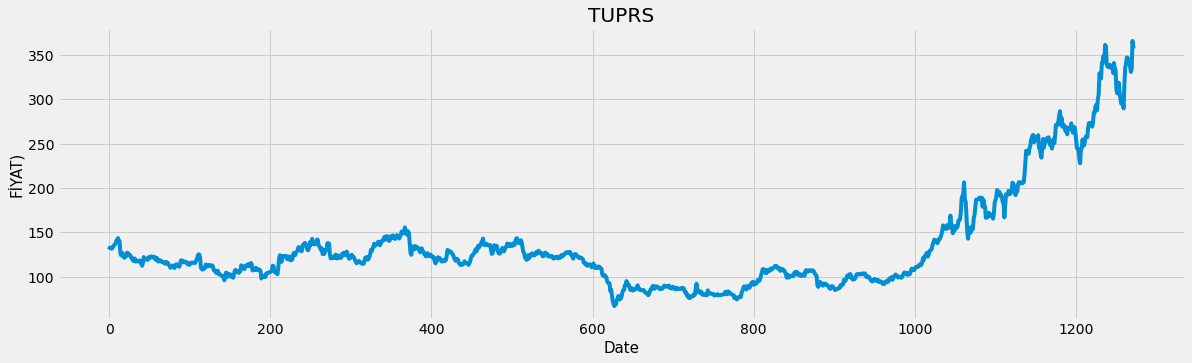

[array([0.21313672, 0.22084451, 0.21916891, 0.21682307, 0.21715816,
       0.22520109, 0.22821715, 0.23257373, 0.23458448, 0.24664879,
       0.24363272, 0.25636732, 0.24597856, 0.24430295, 0.19906167,
       0.19101877, 0.2014075 , 0.19604558, 0.18532173, 0.18230564,
       0.19336463, 0.18699733, 0.20107238, 0.20073727, 0.19772118,
       0.19101877, 0.19269437, 0.18666221, 0.17895443, 0.18130026,
       0.17057641, 0.17292225, 0.17895443, 0.16756032, 0.16823058,
       0.17057641, 0.16923592, 0.16957104, 0.1719169 , 0.16253351,
       0.15985256, 0.15180966, 0.163874  , 0.18465147, 0.17861932,
       0.17560322, 0.17861932, 0.17660859, 0.17392762, 0.18431635,
       0.18230564, 0.18230564, 0.18733245, 0.18498661, 0.18331101,
       0.18666221, 0.18565684, 0.17727883, 0.17426273, 0.18230564,
       0.17560322, 0.16756032, 0.16923592, 0.17325739, 0.16890081,
       0.16957104, 0.16521449, 0.16588472, 0.1655496 , 0.16052279,
       0.15951742, 0.16655498, 0.16119303, 0.16186328, 0.1554

2022-10-20 08:56:49.107430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 1s 21ms/step


/var/folders/sn/c5_cnrs91x7bqw01wmp672540000gn/T/ipykernel_1555/2433922472.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


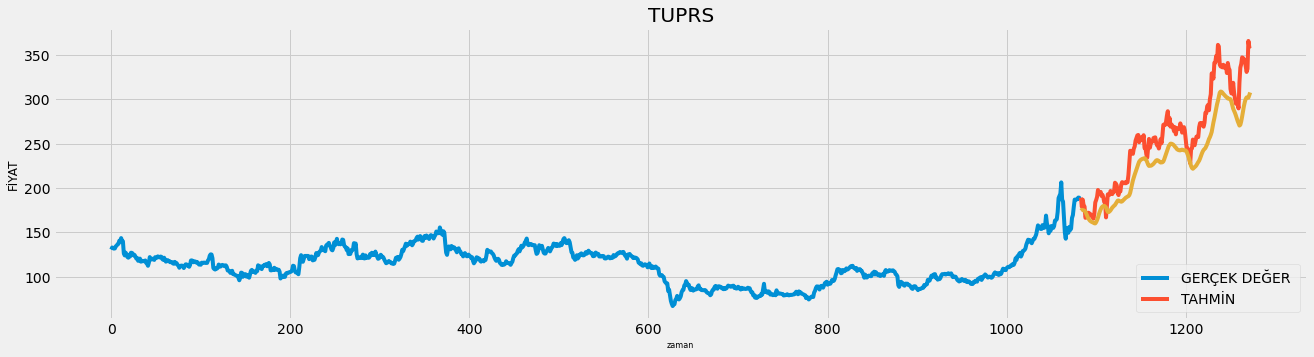

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

df = pd.read_csv("/Users/gokhansit/workspaces/pythonprojets/TUPRS.IS.csv")
df.head()

plt.figure(figsize=(18,5))
plt.title('TUPRS')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15 )
plt.ylabel('FİYAT)', fontsize=15)
plt.show()

data = df.filter(['Close'])

dataset = data.values

from keras.engine import training
training_data_len = math.ceil(len(dataset)*0.85)
training_data_len

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

train_data = scaled_data[0:training_data_len  , : ]

x_train=[]
y_train = []
for i in range(180,len(train_data)):
    x_train.append(train_data[i-180:i,0])
    y_train.append(train_data[i,0])

    if i<=180:
      print(x_train)
      print(y_train)
      print()

x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model = Sequential()
model.add(LSTM(units = 50,return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss = 'mean_squared_error')

model.fit(x_train,y_train,batch_size = 1,epochs = 1)

test_data = scaled_data[training_data_len - 180: , : ]

x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

test_data = scaled_data[training_data_len - 180: , : ]

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

x__tse = np.shape(x_test)
x_test = np.reshape(x_test, (x__tse[0],x__tse[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Undo scaling

#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


plt.figure(figsize=(20,5))
plt.title('TUPRS')
plt.xlabel('zaman', fontsize=8)
plt.ylabel('FİYAT', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ 'GERÇEK DEĞER ', 'TAHMİN'], loc='lower right')
plt.show()